In [1]:
#krow

In [2]:
from krpy import Corey, Krow, sw_denormalize
import pandas as pd
import numpy as np

In [3]:
cor = Corey(nw=2, no=1.7, krw_end=0.5,kro_end=1.0, pco_end=10,npc=1.5, pd=2.0)
cor

Corey(nw=2.0, no=1.7, npc=1.5, krw_end=0.5, kro_end=1.0, pco_end=10.0, pd=2.0)

In [4]:
krow = Krow.from_corey(cor, swir=0.15, sor=0.1, n=20)

/Users/scuervo91/Documents/dev/krpy/krpy/kr.py:160: RuntimeWarning: divide by zero encountered in true_divide
  kr_ratio = kro / krw


In [5]:
df = krow.df()
df

,krw,kro,pcwo,swn,kr_ratio
saturation,,,,,
0.150000,0.000000,1.000000,12.000000,0.000000,inf
0.189474,0.001385,0.912183,11.221007,0.052632,658.596373
0.228947,0.005540,0.827717,10.463363,0.105263,149.402977
0.268421,0.012465,0.746660,9.727688,0.157895,59.898719
0.307895,0.022161,0.669074,9.014658,0.210526,30.191955
0.347368,0.034626,0.595027,8.325016,0.263158,17.184374
0.386842,0.049861,0.524593,7.659586,0.315789,10.521006
0.426316,0.067867,0.457854,7.019281,0.368421,6.746338
0.465789,0.088643,0.394899,6.405129,0.421053,4.454959


[<AxesSubplot:xlabel='Water Saturation []', ylabel='Kr []'>,
 <AxesSubplot:ylabel='Capillary Pressure [psi]'>]

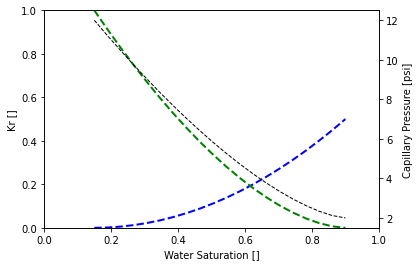

In [6]:
krow.plot(pc=True)

In [7]:
print(krow.to_ecl())

SWOF
0.150000 0.000000 1.000000 12.000000
0.189474 0.001385 0.912183 11.221007
0.228947 0.005540 0.827717 10.463363
0.268421 0.012465 0.746660  9.727688
0.307895 0.022161 0.669074  9.014658
0.347368 0.034626 0.595027  8.325016
0.386842 0.049861 0.524593  7.659586
0.426316 0.067867 0.457854  7.019281
0.465789 0.088643 0.394899  6.405129
0.505263 0.112188 0.335830  5.818296
0.544737 0.138504 0.280757  5.260118
0.584211 0.167590 0.229812  4.732150
0.623684 0.199446 0.183141  4.236231
0.663158 0.234072 0.140921  3.774584
0.702632 0.271468 0.103364  3.349972
0.742105 0.311634 0.070733  2.965961
0.781579 0.354571 0.043374  2.627410
0.821053 0.400277 0.021771  2.341519
0.860526 0.448753 0.006701  2.120745
0.900000 0.500000 0.000000  2.000000/



In [8]:
krow.interpolate(0.5)

,krw,kro,pcwo,swn,kr_ratio
saturation,,,,,
0.5,0.109049,0.343706,5.89654,0.466667,3.188312


<AxesSubplot:xlabel='saturation'>

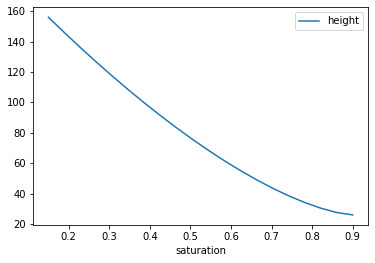

In [9]:
krow.get_height(rhoo=51.2)
krow.df().plot(y='height')

In [10]:
Corey.fit(df.reset_index(),sw='saturation',kro='kro', swir=0.15, sor=0.1)

Corey(nw=1.9999998694430432, no=1.6999081426312752, npc=2.0, krw_end=0.4999999899552103, kro_end=0.9999580575417352, pco_end=0.0, pd=0.0)

In [11]:
df['krw']

saturation
0.150000    0.000000
0.189474    0.001385
0.228947    0.005540
0.268421    0.012465
0.307895    0.022161
0.347368    0.034626
0.386842    0.049861
0.426316    0.067867
0.465789    0.088643
0.505263    0.112188
0.544737    0.138504
0.584211    0.167590
0.623684    0.199446
0.663158    0.234072
0.702632    0.271468
0.742105    0.311634
0.781579    0.354571
0.821053    0.400277
0.860526    0.448753
0.900000    0.500000
Name: krw, dtype: float64

In [12]:
krow.df()

,krw,kro,pcwo,swn,kr_ratio,height
saturation,,,,,,
0.150000,0.000000,1.000000,12.000000,0.000000,inf,155.956679
0.189474,0.001385,0.912183,11.221007,0.052632,658.596373,145.832583
0.228947,0.005540,0.827717,10.463363,0.105263,149.402977,135.985948
0.268421,0.012465,0.746660,9.727688,0.157895,59.898719,126.424824
0.307895,0.022161,0.669074,9.014658,0.210526,30.191955,117.158007
0.347368,0.034626,0.595027,8.325016,0.263158,17.184374,108.195158
0.386842,0.049861,0.524593,7.659586,0.315789,10.521006,99.546960
0.426316,0.067867,0.457854,7.019281,0.368421,6.746338,91.225306
0.465789,0.088643,0.394899,6.405129,0.421053,4.454959,83.243553
